In [1]:
# Import modules
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
# 1.
ds = xr.open_dataset("200301_202006-C3S-L3_GHG-PRODUCTS-OBS4MIPS-MERGED-v4.3.nc", engine="netcdf4")
ds

<xarray.Dataset>
Dimensions:                  (time: 210, bnds: 2, lat: 36, lon: 72, pressure: 10)
Coordinates:
  * time                     (time) datetime64[ns] 2003-01-16T12:00:00 ... 20...
  * lat                      (lat) float64 -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * lon                      (lon) float64 -177.5 -172.5 -167.5 ... 172.5 177.5
Dimensions without coordinates: bnds, pressure
Data variables:
    time_bnds                (time, bnds) datetime64[ns] ...
    lat_bnds                 (lat, bnds) float64 ...
    lon_bnds                 (lon, bnds) float64 ...
    pre                      (pressure) float64 ...
    pre_bnds                 (pressure, bnds) float64 ...
    land_fraction            (lat, lon) float64 ...
    xch4                     (time, lat, lon) float32 ...
    xch4_nobs                (time, lat, lon) float64 ...
    xch4_stderr              (time, lat, lon) float32 ...
    xch4_stddev              (time, lat, lon) float32 ...
    column_averaging_kernel  (time, pressure, lat, lon) float32 ...
    vmr_profile_ch4_apriori  (time, pressure, lat, lon) float32 ...
Attributes: (12/28)
    activity_id:            obs4MIPs
    comment:                Since long time, climate modellers use ensemble a...
    contact:                Maximilian Reuter (maximilian.reuter@iup.physik.u...
    Conventions:            CF-1.7 ODS-2.1
    creation_date:          2021-02-05T09:48:47Z
    data_specs_version:     2.1.0
    ...                     ...
    source_version_number:  v4.3
    title:                  C3S XCH4 v4.3
    tracking_id:            892d184a-7b35-4bba-836a-94b9cfeb360e
    variable_id:            xch4
    variant_info:           Best Estimate
    variant_label:          BE

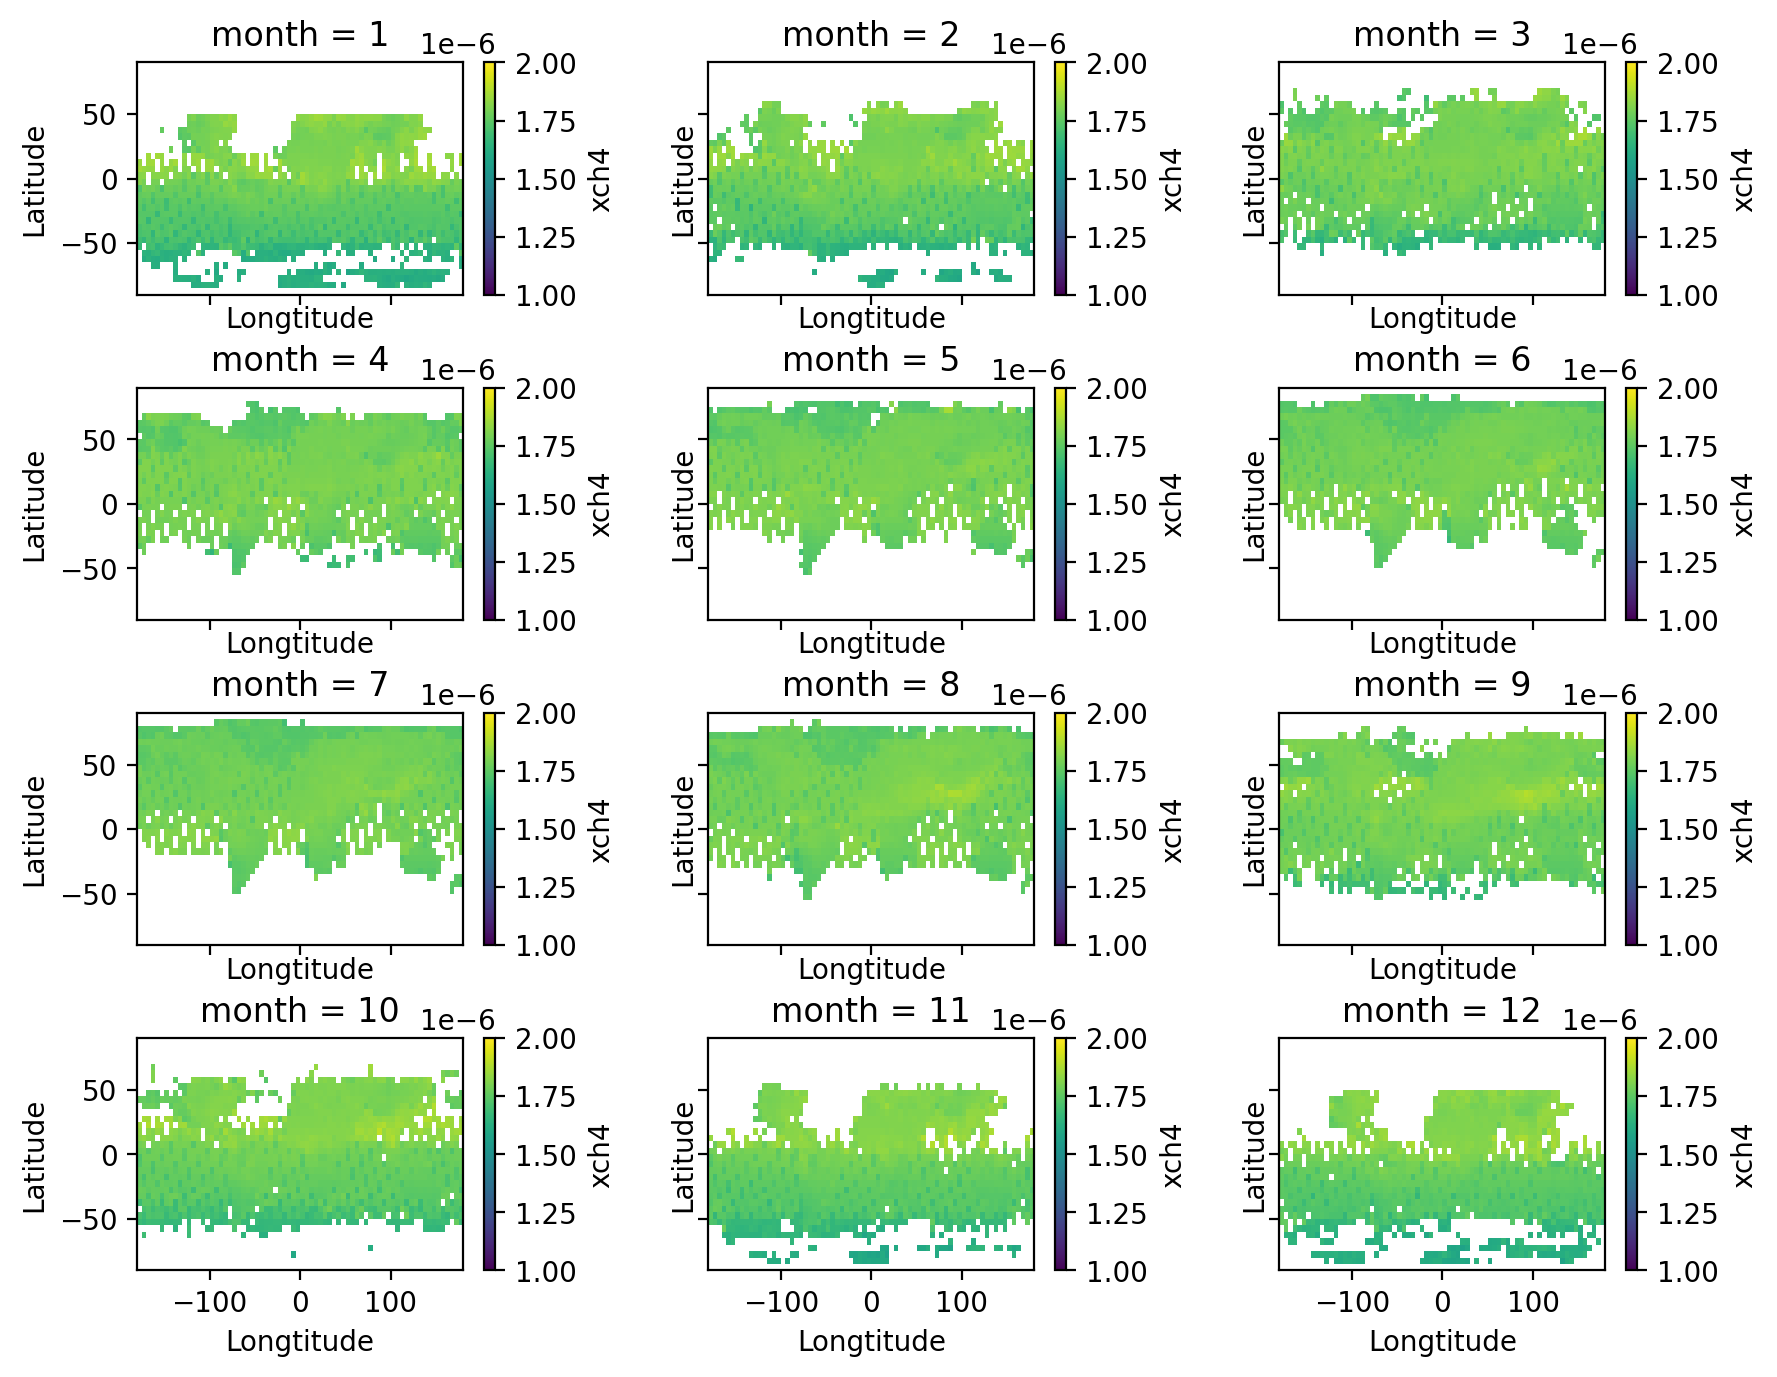

In [15]:
# 1.1
xch4_month_mean = ds.xch4.groupby("time.month").mean()
fig,ax=plt.subplots(4,3, figsize=(10,8),sharex="all",sharey="all",dpi=200)
ax=ax.flatten()
for i in range(12):
    ax[i]=plt.subplot(4,3,i+1)
    xch4_month_mean[i,:,:].plot(vmin=0.000001, vmax=0.000002)
    plt.xlabel("Longtitude",fontsize=10)
    plt.ylabel("Latitude",fontsize=10)
plt.subplots_adjust(wspace=0.4,hspace=0.4)


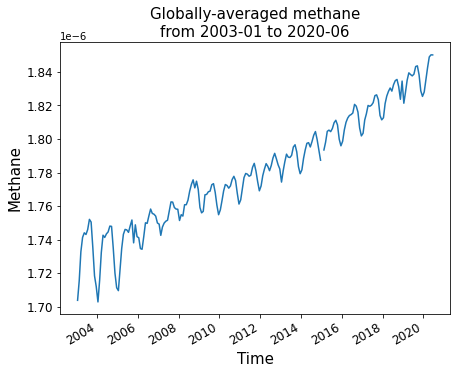

In [4]:
# 1.2
ds.xch4.mean(dim=('lon', 'lat')).sel(time=slice("2003-01", "2020-06")).plot(figsize=(7,5))
plt.title("Globally-averaged methane\nfrom 2003-01 to 2020-06",fontsize=15)
plt.xlabel("Time",fontsize=15)
plt.ylabel("Methane",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

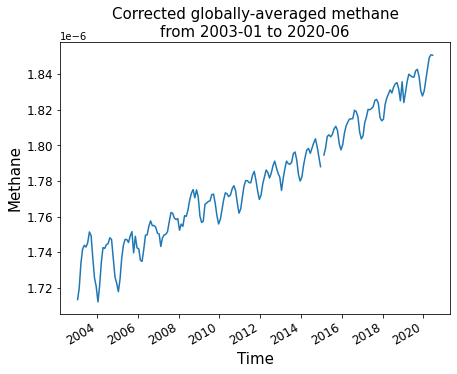

In [5]:
# 1.2 connected above
weights = np.cos(np.deg2rad(ds.lat))
xch4_weighted = ds.xch4.weighted(weights)
xch4_weighted.mean(dim=('lon', 'lat')).plot(figsize=(7,5))
plt.title("Corrected globally-averaged methane\nfrom 2003-01 to 2020-06",fontsize=15)
plt.xlabel("Time",fontsize=15)
plt.ylabel("Methane",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

D:\Users\60918\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
D:\Users\60918\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


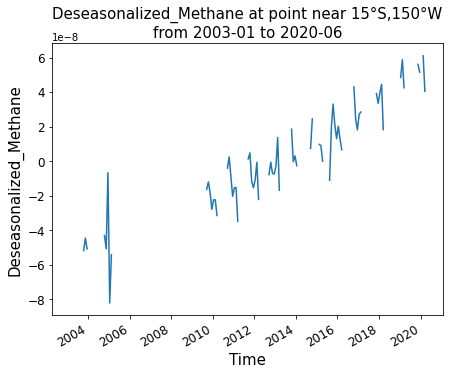

In [6]:
# 1.3
S15_W150=ds.xch4.sel(lon=-150,lat=-15,method="nearest")
group_data=S15_W150.sel(time=slice("2003-01","2020-06")).groupby("time.month")

# Apply mean to grouped data, and calculate Deseasonalized_Methane
Deseasonalized_Methane = group_data - group_data.mean(dim='time')
Deseasonalized_Methane.plot(figsize=(7,5))
plt.title("Deseasonalized_Methane at point near 15°S,150°W\nfrom 2003-01 to 2020-06",fontsize=15)
plt.xlabel("Time",fontsize=15)
plt.ylabel("Deseasonalized_Methane",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [7]:
# 2.
ds2 = xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")
ds2

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

In [8]:
# 2.1
Nino3_4=ds2.sst.sel(lat=slice(-5,5), lon=slice(190,240))
group_data = Nino3_4.groupby('time.month')

# Apply mean to grouped data, and then compute the anomalies 
sst_anomalies = group_data - group_data.mean(dim='time')
Resample_3Months = sst_anomalies.resample(time="3M")
Resample_sst_anomalies=Resample_3Months.mean(dim="time")
Resample_sst_anomalies

<xarray.DataArray 'sst' (time: 229, lat: 5, lon: 26)>
array([[[-4.31577682e-01, -4.18462753e-01, -3.97953033e-01, ...,
         -2.11664200e-01, -2.37762451e-01, -2.44014740e-01],
        [-4.12590027e-01, -4.06719208e-01, -3.87514114e-01, ...,
         -5.20648956e-01, -5.34645081e-01, -5.19971848e-01],
        [-4.09322739e-01, -3.97438049e-01, -3.62377167e-01, ...,
         -6.37388229e-01, -6.17195129e-01, -5.83724976e-01],
        [-4.14085388e-01, -3.79093170e-01, -3.21561813e-01, ...,
         -4.32926178e-01, -3.84042740e-01, -3.35262299e-01],
        [-5.04367828e-01, -4.38940048e-01, -3.71025085e-01, ...,
         -1.74535751e-01, -1.10445023e-01, -6.91814423e-02]],

       [[-4.34304565e-01, -4.11919922e-01, -3.80833298e-01, ...,
         -2.34196976e-01, -2.69255310e-01, -2.73969650e-01],
        [-4.45957184e-01, -4.12000030e-01, -3.67994308e-01, ...,
         -5.37923813e-01, -5.70958436e-01, -5.63295364e-01],
        [-4.64090973e-01, -4.16372925e-01, -3.52096558e-01, ...,
         -6.36102021e-01, -6.32293701e-01, -6.25462830e-01],
        [-4.85488266e-01, -4.30688858e-01, -3.54335785e-01, ...,
         -4.52582687e-01, -4.23582703e-01, -4.12778229e-01],
        [-5.82661331e-01, -5.20365417e-01, -4.54551697e-01, ...,
...
        [-7.30498016e-01, -8.12325180e-01, -8.80907059e-01, ...,
         -7.10569382e-01, -6.31128311e-01, -5.32169998e-01],
        [-9.77057755e-01, -1.03931940e+00, -1.08908331e+00, ...,
         -7.64347076e-01, -6.85469329e-01, -6.09845459e-01],
        [-7.90389359e-01, -8.42882812e-01, -8.73820007e-01, ...,
         -4.55050796e-01, -4.07323211e-01, -3.71250153e-01],
        [-3.22086334e-01, -3.76546234e-01, -4.13348526e-01, ...,
         -2.10369110e-01, -1.91286087e-01, -1.61457703e-01]],

       [[-4.54637527e-01, -5.11337280e-01, -5.60937881e-01, ...,
         -2.93106079e-01, -2.01011658e-01, -8.88051987e-02],
        [-8.78618240e-01, -9.42394257e-01, -9.98949051e-01, ...,
         -7.94350624e-01, -6.92551613e-01, -5.67633629e-01],
        [-1.07530212e+00, -1.14840794e+00, -1.21267223e+00, ...,
         -9.89422798e-01, -8.89242172e-01, -7.72073746e-01],
        [-9.11746979e-01, -9.98181343e-01, -1.07053089e+00, ...,
         -6.86944962e-01, -6.11206055e-01, -5.13758659e-01],
        [-5.31754494e-01, -6.18759155e-01, -6.96014404e-01, ...,
         -3.98782730e-01, -3.31537247e-01, -2.39914894e-01]]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1960-01-31 1960-04-30 ... 2017-01-31
  * lat      (lat) float32 -4.0 -2.0 0.0 2.0 4.0
  * lon      (lon) float32 190.0 192.0 194.0 196.0 ... 234.0 236.0 238.0 240.0

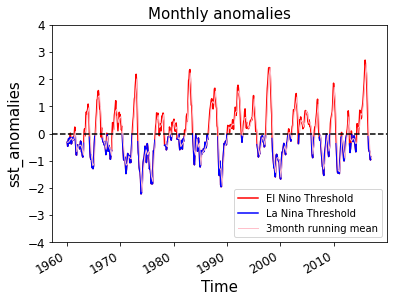

In [19]:
# 2.2
# Plot anomalies
Monthly_anomalies=sst_anomalies.mean(dim=("lon","lat"))
#plt.bar(np.arange(len(Nino3_4["time"])),Monthly_anomalies)
line1=Monthly_anomalies.plot(color="red",linewidth=1.5,linestyle="-")
masked_sample = Monthly_anomalies.where(Monthly_anomalies < 0)
line2=masked_sample.plot(color="blue",linewidth=1.5,linestyle="-")
line3=Resample_sst_anomalies.mean(dim=("lon","lat")).plot(color="pink",linewidth=1.0,linestyle="-")
plt.legend(labels=["El Nino Threshold","La Nina Threshold","3month running mean"])
plt.axhline(y=0,color="black",linestyle='--',linewidth=1.5)
plt.title("Monthly anomalies",fontsize=15)
plt.xlabel("Time",fontsize=15)
plt.ylabel("sst_anomalies",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(-4,4)
plt.show()

In [22]:
# 3.
ds3 = xr.open_dataset("CESM2_200001-201412.nc", engine="netcdf4")
ds3

D:\Users\60918\anaconda3\lib\site-packages\xarray\conventions.py:512: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


<xarray.Dataset>
Dimensions:    (time: 180, lat: 192, lon: 288, nbnd: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time       (time) object 2000-01-15 12:00:00 ... 2014-12-15 12:00:00
Dimensions without coordinates: nbnd
Data variables:
    tas        (time, lat, lon) float32 ...
    time_bnds  (time, nbnd) object ...
    lat_bnds   (lat, nbnd) float64 ...
    lon_bnds   (lon, nbnd) float64 ...
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  219000.0
    case_id:                972
    ...                     ...
    sub_experiment_id:      none
    table_id:               Amon
    tracking_id:            hdl:21.14100/a7278f6d-6a1b-4050-8f06-a8033604736a
    variable_id:            tas
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r11i1p1f1

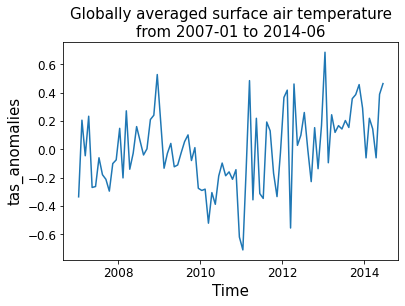

In [34]:
# 3.1
New_ds3=ds3.tas.mean(dim=("lon", "lat")).sel(time=slice("2007-01", "2014-06"))
group_data = New_ds3.groupby('time.month')

# Apply mean to grouped data, and then compute the anomalies 
tas_anomalies = group_data - group_data.mean(dim="time")
tas_anomalies.plot()
plt.title("Globally averaged surface air temperature\nfrom 2007-01 to 2014-06",fontsize=15)
plt.xlabel("Time",fontsize=15)
plt.ylabel("tas_anomalies",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

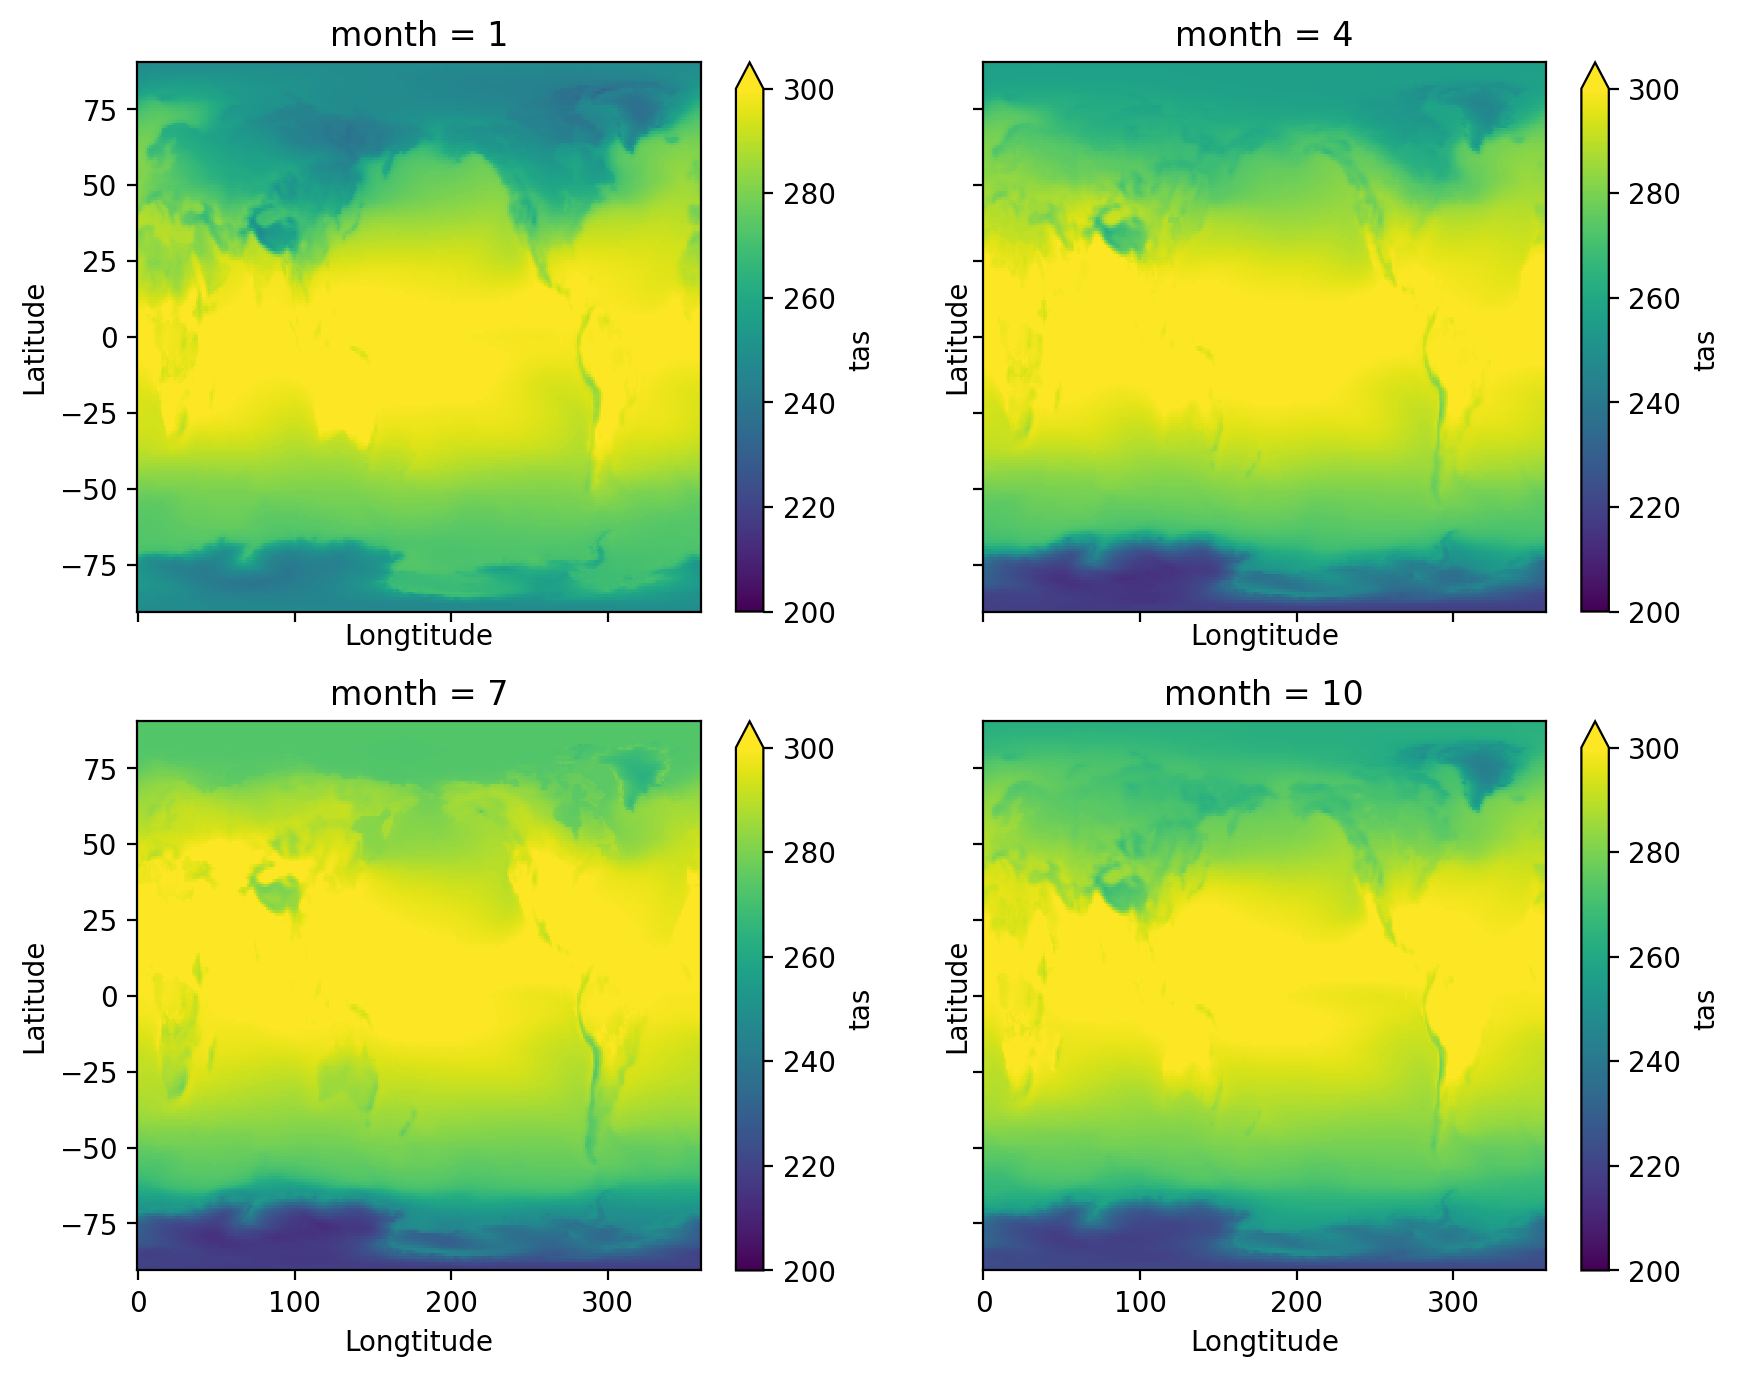

In [33]:
# 3.2.1
tas_month_mean = ds3.tas.sel(time=slice("2007-01", "2014-06")).groupby("time.month").mean()

fig,ax=plt.subplots(2,2, figsize=(10,8),sharex="all",sharey="all",dpi=200)
ax=ax.flatten()
for i in range(4):
    ax[i]=plt.subplot(2,2,i+1)
    tas_month_mean[i*3,:,:].plot(vmin=200, vmax=300)
    plt.xlabel("Longtitude",fontsize=10)
    plt.ylabel("Latitude",fontsize=10)
plt.subplots_adjust(wspace=0.2,hspace=0.2)

D:\Users\60918\anaconda3\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
D:\Users\60918\anaconda3\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
D:\Users\60918\anaconda3\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
D:\Users\60918\anaconda3\lib\site-packages\cartopy\crs.py:402: ShapelyDeprecationWarning: Iterati

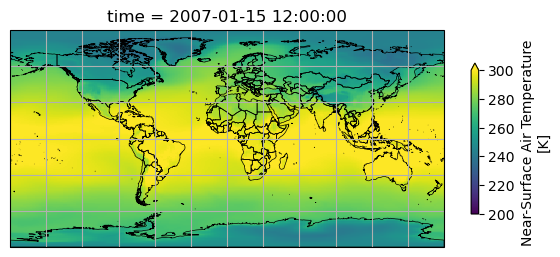

In [66]:
# 3.2.2
# Create and define the size of a figure object 
plt.figure(figsize=(7,5), dpi=100)

# Create an axes with Orthographic projection style
proj = ccrs.PlateCarree() 
ax = plt.axes(projection=proj)
surface_T= ds3.tas.sel(time="2007-01")
# Plot the surface temperature
surface_T.plot(ax=ax, transform=ccrs.PlateCarree(),
         vmin=200, vmax=300, cbar_kwargs={"shrink": 0.4})

# Add border lines over countries 
ax.add_feature(cfeature.NaturalEarthFeature(category="cultural",
                                           name="admin_0_countries",
                                           scale="50m",
                                           facecolor="none",
                                           edgecolor="black",
                                           linewidth=0.5))

# Add lat/lon gridlines, draw gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree())
# Manipulate latitude and longitude gridline numbers and spacing
gl.ylocator = mticker.FixedLocator(np.arange(-90,91,30))
gl.xlocator = mticker.FixedLocator(np.arange(-180, 181, 30))

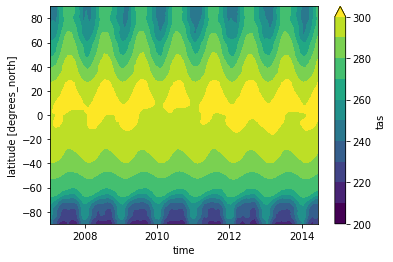

In [65]:
# 3.2.3
ds3.tas.mean(dim="lon").sel(time=slice("2007-01", "2014-06")).plot.contourf(x="time", 
                                       levels=11, vmin=200, vmax=300)

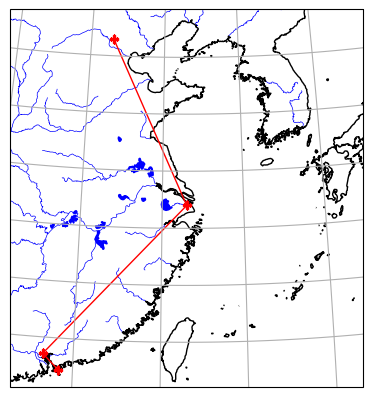

In [63]:
# 3.2.4
#Beijing=116.5E, 39.9N
#Shanghai=121.5E,31.2N
#HongKong=114.2E,22.3N
#Guangzhou=113.25E,23.13N
# Create some test data
HongKong = dict(lon=114.2, lat=22.3)
Guangzhou = dict(lon=113.25, lat=23.13)
Shanghai=dict(lon=121.5, lat=31.2)
Beijing=dict(lon=116.5, lat=39.9)
lons = [HongKong["lon"], Guangzhou["lon"],Shanghai["lon"],Beijing["lon"]]
lats = [HongKong["lat"], Guangzhou["lat"],Shanghai["lat"],Beijing["lat"]]

# Now use higher-resolution features
rivers_10m = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m')

# Create and define the size of a figure object 
plt.figure(figsize=(7,5), dpi=100)

# Set Orthographic projection style
central_lon, central_lat = 121.5, 31.2 # Shanghai
proj = ccrs.Orthographic(central_lon, central_lat) 

# Create an axes with Orthographic projection style
ax = plt.axes(projection=proj)

# Set a region and plot
extent = [central_lon-10, central_lon+10, central_lat-10, central_lat+10]
ax.set_extent(extent)

# Add features to axes using cartopy.feature (cfeature)
ax.add_feature(cfeature.LAKES, edgecolor='blue', facecolor='blue',zorder=1)
ax.add_feature(rivers_10m, facecolor='None', edgecolor='blue', linewidth=0.5)

# Add features to axes using coastlines method
ax.coastlines(resolution='10m')
ax.gridlines()

# Add two points
ax.plot(lons, lats, 'rP-', linewidth=1,transform=ccrs.PlateCarree())

D:\Users\60918\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
D:\Users\60918\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
D:\Users\60918\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
D:\Users\60918\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.


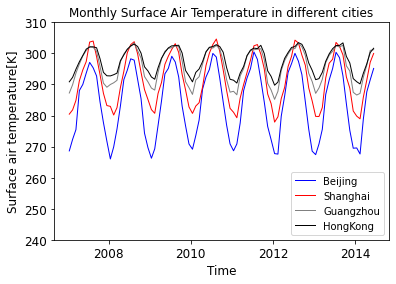

In [60]:
# 3.2.5
#Beijing=116.5E, 39.9N
#Shanghai=121.5E,31.2N
#HongKong=114.2E,22.3N
#Guangzhou=113.25E,23.13N
Beijing=ds3.tas.sel(time=slice("2007-01", "2014-06")).sel(lon=116.5,lat=39.9,method="nearest")
Shanghai=ds3.tas.sel(time=slice("2007-01", "2014-06")).sel(lon=121.5,lat=31.2,method="nearest")
HongKong=ds3.tas.sel(time=slice("2007-01", "2014-06")).sel(lon=114.2,lat=22.3,method="nearest")
Guangzhou=ds3.tas.sel(time=slice("2007-01", "2014-06")).sel(lon=113.25,lat=23.13,method="nearest")
Beijing.plot(color="blue",linewidth=1.0,linestyle="-")
Shanghai.plot(color="red",linewidth=1.0,linestyle="-")
Guangzhou.plot(color="grey",linewidth=1.0,linestyle="-")
HongKong.plot(color="black",linewidth=1.0,linestyle="-")
plt.legend(labels=["Beijing","Shanghai","Guangzhou","HongKong"],loc="lower right")
plt.title("Monthly Surface Air Temperature in different cities",fontsize=12)
plt.xlabel("Time",fontsize=12)
plt.ylabel("Surface air temperature[K]",fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(240,310)
plt.show()